### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

### Import Dataset

In [2]:
from keras.datasets import cifar10

data = cifar10.load_data()
data

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(X_train, y_train), (X_test, y_test) = data

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [6]:
y_train = y_train.flatten()
print(y_train)
y_test = y_test.flatten()
print(y_test)

[6 9 9 ... 9 1 1]
[3 8 8 ... 5 1 7]


In [7]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

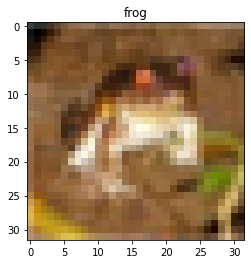

In [8]:
plt.imshow(X_train[0])
plt.title(labels[y_train[0]])
plt.show()

### Normalize the Data

In [9]:
X_train = X_train / 255
X_test = X_test / 255

### CNN with ANN

In [10]:
cnn1 = Sequential()
# Feature Extraction
cnn1.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu'))
cnn1.add(MaxPool2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Conv2D(128, (3, 3), activation='relu'))
cnn1.add(MaxPool2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))
cnn1.add(Flatten())
# Classification
cnn1.add(Dropout(0.2))
cnn1.add(Dense(10, activation="softmax"))  # 2 classes (cats or dogs): 1 neuron is enough
cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 128)         0

In [11]:
cnn1.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
hist = cnn1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

2022-03-01 14:27:18.916200: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-01 14:27:19.531848: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
1563/1563 [==============================] - 9s 4ms/step - loss: 1.4902 - acc: 0.4656 - val_loss: 1.1964 - val_acc: 0.5769
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1506 - acc: 0.6014 - val_loss: 1.0498 - val_acc: 0.6326
Epoch 3/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0397 - acc: 0.6372 - val_loss: 0.9637 - val_acc: 0.6648
Epoch 4/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9690 - acc: 0.6626 - val_loss: 0.9294 - val_acc: 0.6788
Epoch 5/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9277 - acc: 0.6785 - val_loss: 0.8951 - val_acc: 0.6954
Epoch 6/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8873 - acc: 0.6928 - val_loss: 0.8727 - val_acc: 0.6936
Epoch 7/50
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8554 - acc: 0.7056 - val_loss: 0.8291 - val_acc: 0.7148
Epoch 8/50
1563/1563 [==============================] - 6s 4ms

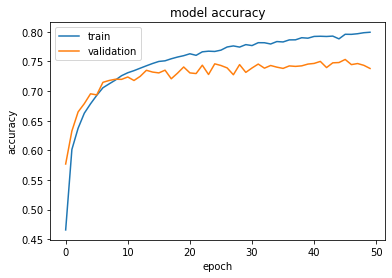

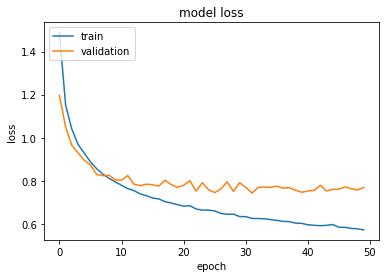

In [12]:
#  "Accuracy"
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [13]:
cnn2 = Sequential()
# Feature Extraction
cnn2.add(Conv2D(128, (3, 3), input_shape=(32, 32, 3), activation='relu', padding="same"))
cnn2.add(MaxPool2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.2))
cnn2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
cnn2.add(MaxPool2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.2))
cnn2.add(Flatten())
# Classification
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(10, activation="softmax"))
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 128)        

In [14]:
cnn2.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
hist = cnn2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=1)

2022-03-01 14:32:42.119857: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-01 14:32:42.724086: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5079 - acc: 0.4532 - val_loss: 1.1897 - val_acc: 0.5796
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1722 - acc: 0.5844 - val_loss: 1.0255 - val_acc: 0.6410
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0479 - acc: 0.6320 - val_loss: 0.9445 - val_acc: 0.6757
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9595 - acc: 0.6618 - val_loss: 0.8970 - val_acc: 0.6878
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8893 - acc: 0.6849 - val_loss: 0.9146 - val_acc: 0.6879
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8446 - acc: 0.7016 - val_loss: 0.8366 - val_acc: 0.7081
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8032 - acc: 0.7171 - val_loss: 0.8325 - val_acc: 0.7151
Epoch 8/50
1563/1563 [==============================] - 7s 5ms

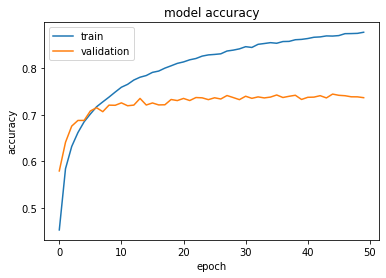

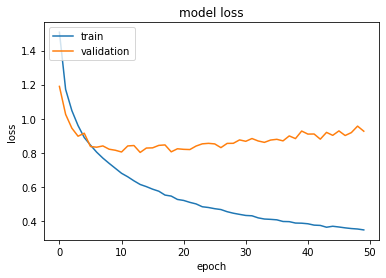

In [15]:
#  "Accuracy"
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
cnn3 = Sequential()
#Feature Extraction
#Block1
cnn3.add(Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3), padding="same"))
cnn3.add(BatchNormalization())
cnn3.add(MaxPool2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))
#Block2
cnn3.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
cnn3.add(BatchNormalization())
cnn3.add(MaxPool2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.3))
#Block3
cnn3.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
cnn3.add(BatchNormalization())
cnn3.add(MaxPool2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

#Classification
cnn3.add(Dense(512, activation="relu"))
cnn3.add(Dropout(0.4))
cnn3.add(Dense(10, activation="softmax"))
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)      

In [17]:
cnn3.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = cnn3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=2)

2022-03-01 14:39:06.341168: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 - 8s - loss: 1.6579 - accuracy: 0.4140 - val_loss: 1.2252 - val_accuracy: 0.5553 - 8s/epoch - 5ms/step
Epoch 2/100
1563/1563 - 6s - loss: 1.2708 - accuracy: 0.5469 - val_loss: 1.3258 - val_accuracy: 0.5509 - 6s/epoch - 4ms/step
Epoch 3/100
1563/1563 - 6s - loss: 1.1346 - accuracy: 0.6025 - val_loss: 1.0599 - val_accuracy: 0.6287 - 6s/epoch - 4ms/step
Epoch 4/100
1563/1563 - 6s - loss: 1.0417 - accuracy: 0.6348 - val_loss: 0.9917 - val_accuracy: 0.6645 - 6s/epoch - 4ms/step
Epoch 5/100
1563/1563 - 6s - loss: 0.9668 - accuracy: 0.6629 - val_loss: 0.9856 - val_accuracy: 0.6739 - 6s/epoch - 4ms/step
Epoch 6/100
1563/1563 - 6s - loss: 0.9129 - accuracy: 0.6832 - val_loss: 0.8914 - val_accuracy: 0.7024 - 6s/epoch - 4ms/step
Epoch 7/100
1563/1563 - 6s - loss: 0.8796 - accuracy: 0.6938 - val_loss: 0.8063 - val_accuracy: 0.7243 - 6s/epoch - 4ms/step
Epoch 8/100
1563/1563 - 6s - loss: 0.8456 - accuracy: 0.7063 - val_loss: 0.8524 - val_accuracy: 0.7147 - 6s/epoch - 4ms/step


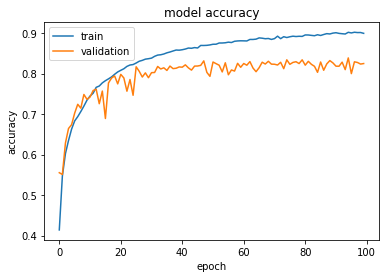

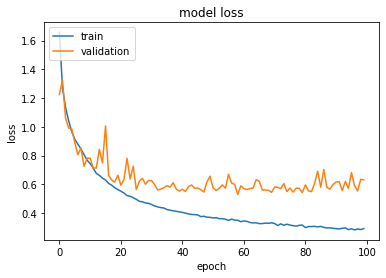

In [18]:
#  "Accuracy"
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_preds = cnn3.predict(X_test)
y_preds

array([[3.06402580e-05, 2.01109440e-08, 1.34016993e-03, ...,
        3.44248257e-08, 6.49925232e-06, 1.93693008e-08],
       [1.03326961e-07, 2.94073089e-03, 1.10237789e-14, ...,
        1.01724041e-15, 9.97059107e-01, 6.60267858e-08],
       [4.70473606e-04, 3.12011801e-02, 3.16085197e-06, ...,
        5.58134525e-06, 9.67935503e-01, 3.55507887e-04],
       ...,
       [1.26040096e-12, 3.79683507e-11, 1.49828229e-05, ...,
        1.07601936e-05, 2.68190348e-11, 3.88818144e-10],
       [1.87487714e-02, 9.73901272e-01, 1.77043548e-03, ...,
        4.70646592e-05, 9.12514406e-06, 1.01752375e-04],
       [9.22317653e-19, 1.60926096e-18, 7.22394760e-15, ...,
        9.99999881e-01, 6.97176497e-21, 1.30970521e-15]], dtype=float32)

In [24]:
y_preds_final = np.argmax(y_preds, axis=1)
y_preds_final

array([3, 8, 8, ..., 5, 1, 7])

In [25]:
print("Accuracy: ", accuracy_score(y_test, y_preds_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_preds_final))
print("Classification Report:\n", classification_report(y_test, y_preds_final))

Accuracy:  0.8249
Confusion Matrix:
 [[801   7  44  10  35   5  16   8  58  16]
 [  8 890   5   9   2   4  15   2  23  42]
 [ 29   1 725  40  75  48  66  10   5   1]
 [  3   3  42 635  59 148  80  21   6   3]
 [  3   1  23  29 852  22  50  18   2   0]
 [  4   0  22 112  47 767  29  18   0   1]
 [  0   0  11  18  15  14 937   2   3   0]
 [  4   0  21  29  53  37   9 843   2   2]
 [ 15   4   9   6  11   4  12   4 924  11]
 [ 13  41   5  11   9   6  11   7  22 875]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      1000
           1       0.94      0.89      0.91      1000
           2       0.80      0.72      0.76      1000
           3       0.71      0.64      0.67      1000
           4       0.74      0.85      0.79      1000
           5       0.73      0.77      0.75      1000
           6       0.76      0.94      0.84      1000
           7       0.90      0.84      0.87      1000
           8       0.

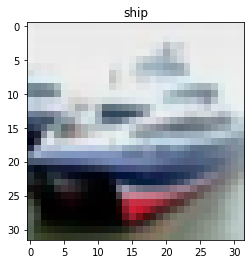

ship


In [26]:
plt.imshow(X_test[1])
plt.title(labels[y_test[1]])
plt.show()

print(labels[y_preds_final[1]])